## Business Understanding
Now let's look at the 2nd question of interest.  That is - What part of the StackOverflow affects the users satisfaction towards StackOverflow?
I use the data from the Stack Overflow survey answered by more than 64,000 reviewers, with the personal information, coding experience, attitude towards coding and etc.

To answer this question we need to use the data related to the StackOverflow satisfaction such as the answers to question regarding the StackOverflow's service, moderation, community and etc.

## Data Understanding
To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Pick the questionaire answers related to StackOverflow services.
rel_col = [
    'StackOverflowSatisfaction', 'StackOverflowDescribes', 'StackOverflowDevices', 
    'StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 'StackOverflowJobListing', 'StackOverflowCompanyPage',
    'StackOverflowJobSearch','StackOverflowNewQuestion', 'StackOverflowAnswer', 'StackOverflowMetaChat', 
    'StackOverflowAdsRelevant', 'StackOverflowAdsDistracting', 'StackOverflowModeration',
    'StackOverflowCommunity', 'StackOverflowHelpful'
    ]
df_rel = df[rel_col]

Let's look into the quantative variables first, from the description below it seems the only quantative variable is StackOverflowSatisfaction and it has null values.

In [40]:
print('Total rows:', len(df_rel))
df_rel.describe()

Total rows: 51392


,StackOverflowSatisfaction
count,36592.000000
mean,8.429875
std,1.390635
min,0.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


Great, seems many people likes StackOverflow.Let's also check what the categorical variables look like.

In [37]:
# Check what kinds of values do the categorical variables contain 
for col in df_rel.select_dtypes(include = ['object']).columns:
    print(col)
    print(df_rel[col].value_counts())
    print()

StackOverflowDescribes
I have a login for Stack Overflow, but haven't created a CV or Developer Story    19696
I have created a CV or Developer Story on Stack Overflow                           8906
I've visited Stack Overflow, but haven't logged in/created an account              8012
I'd never heard of Stack Overflow before today                                      196
I've heard of Stack Overflow, but have never visited                                122
Name: StackOverflowDescribes, dtype: int64

StackOverflowDevices
Desktop                                                                             16516
Desktop; Android browser                                                             7640
Desktop; iOS browser                                                                 3688
Desktop; Android browser; Android app                                                2001
Desktop; Android app                                                                 1503
Desktop; iOS browser; 

It seems some of the question has too many irregular answers and need to be cleaned.

## Prepare Data
Let's begin cleaning the variables. For StackOverflowSatisfaction just delete the null values since it has only a small portion.


In [41]:
# delete the NaN in StackOverflowSatisfaction
df_rel = df_rel[df_rel['StackOverflowSatisfaction'].notna()]

Also note that for the StackOverflowDevices, almost all the users use desktop, so it might be meaningless to use StackOverflowDevices for modeling.

In [9]:
# remove StackOverflowDevices since almost all users use desktops
df_rel = df_rel.drop('StackOverflowDevices', axis=1)

In [12]:
# Check what kinds of values do the categorical variables contain after the cleaning
for col in df_rel.select_dtypes(include = ['object']).columns:
    print(col)
    print(df_rel[col].value_counts())
    print()

StackOverflowDescribes
I have a login for Stack Overflow, but haven't created a CV or Developer Story    19686
I have created a CV or Developer Story on Stack Overflow                           8901
I've visited Stack Overflow, but haven't logged in/created an account              8005
Name: StackOverflowDescribes, dtype: int64

StackOverflowFoundAnswer
At least once each week    13090
Several times              12441
At least once each day      5279
Once or twice               2861
Haven't done at all          619
Name: StackOverflowFoundAnswer, dtype: int64

StackOverflowCopiedCode
Once or twice              10400
Several times              10239
Haven't done at all         8433
At least once each week     3811
At least once each day      1026
Name: StackOverflowCopiedCode, dtype: int64

StackOverflowJobListing
Haven't done at all        19640
Once or twice               7916
Several times               4477
At least once each week     1156
At least once each day       279
Name: Stac

Since all explainatory variables are categorical, get dummys and use random forest model

In [13]:
# Define the function to clean data: create dummies for 
# catagorical variables, and return df
def add_dummies(df):
    '''
    INPUT
    df - the dataframe to be added dummy variables
    
    OUTPUT
    df - the dataframe output with all the categorical variables
        converted to dummy variables
    '''
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    return df

df_rel = add_dummies(df_rel)

## Data Modeling
Use randomforest instead of linear model since all the explainatory variables are categorical.

In [15]:
### Use randomforest instead of linear model
from sklearn.ensemble import RandomForestRegressor

### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response

        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    rf_model = RandomForestRegressor() 
    rf_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

## Evaluation
Evaluate the model performance, from the result below you can see the model is underfit and needs improvement.

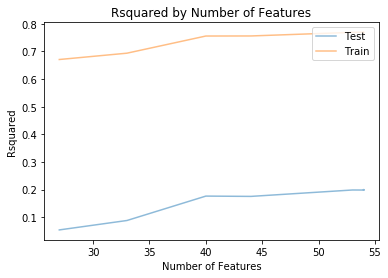

In [21]:
X = df_rel.drop('StackOverflowSatisfaction', axis=1)
y = df_rel['StackOverflowSatisfaction']


cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

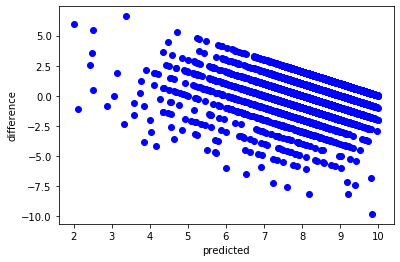

In [22]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

## Model improvement
Use GridSearchCV to search for optimal hyper parameters.

In [23]:
# use GridSearchCV to search for optimal hyper parameters

from sklearn.model_selection import GridSearchCV

### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True, param_grid=None):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''

    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        if param_grid==None:
            rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

        else:
            rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
            rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
            
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    if param_grid==None:
        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

    else:
        rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
        rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
    rf_model.fit(X_train, y_train)
     
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

### Evaluation
Looks better than before.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 

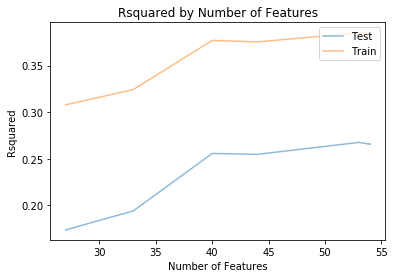

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.3s finished


In [24]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
params = {'n_estimators': [10, 100, 1000], 'max_depth': [1, 5, 10, 100]}
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs, param_grid=params)

Let's check the importance of features.

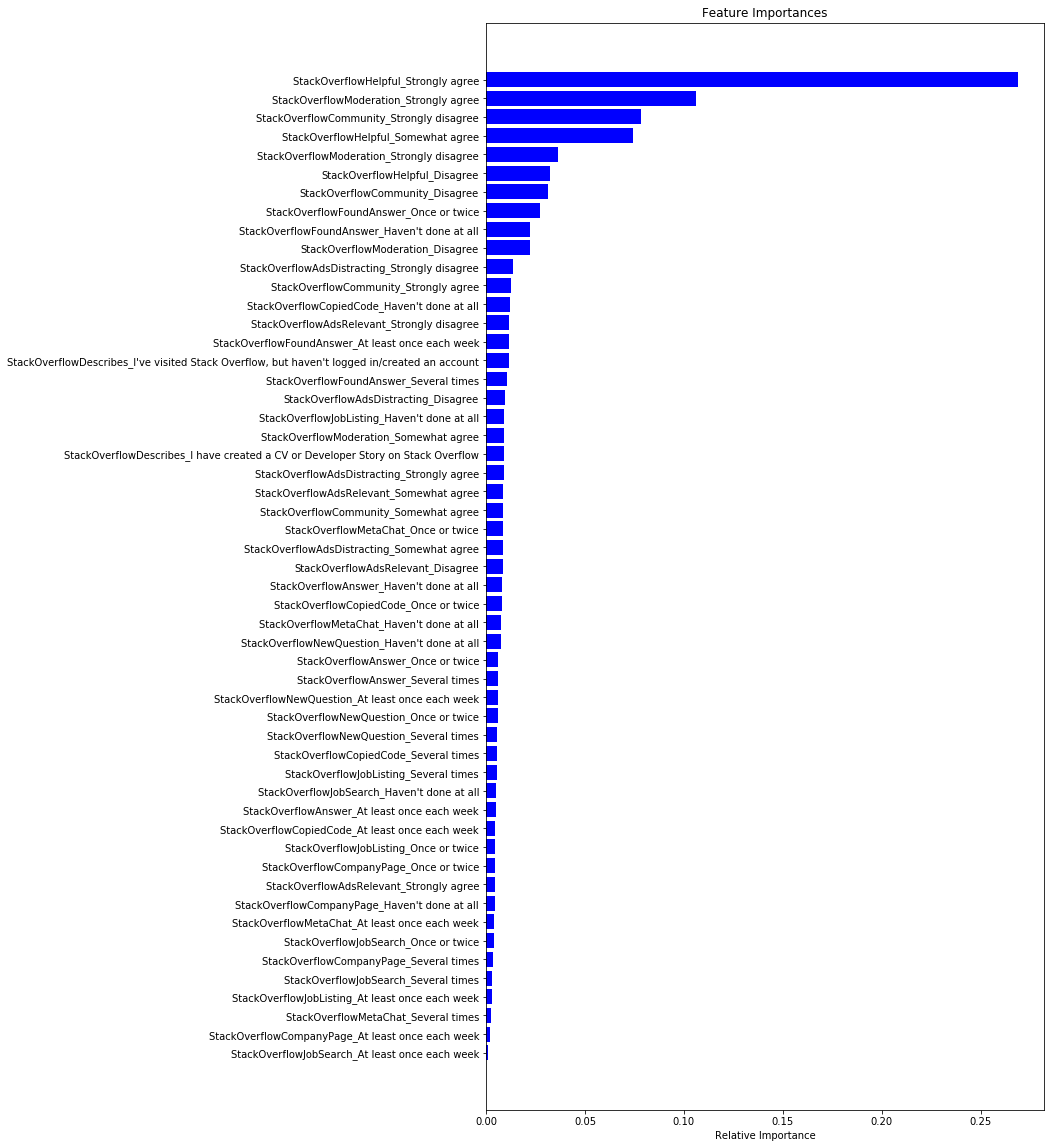

In [30]:
features = X_train.columns
importances = rf_model.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that the top 3 facter affecting the satisfaction of StackOverflow is whether it's helpful, whether the moderation is fair, and whether the community is strong, so StackOverflow should keep or improve mainly from the usability, the moderation and the community.